Cargar librerias

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

In [69]:
from heatmap import corrplot

In [77]:
from sklearn.linear_model import LinearRegression

Lectura de csv

In [28]:
c_udemy_df=pd.read_csv("udemy_courses.csv")
c_cour_df=pd.read_csv("Coursera_courses.csv")
c_edx_df=pd.read_csv("edx_courses.csv")
reviews_df=pd.read_csv("Coursera_reviews.csv")

In [59]:
c_udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
 12  course_revenue      

In [123]:
c_udemy_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,course_revenue,year_published,is_paid_str
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,429400,2017,Pagado
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,209400,2017,Pagado
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,97830,2016,Pagado
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,232845,2017,Pagado
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,255200,2016,Pagado


In [6]:
c_udemy_df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


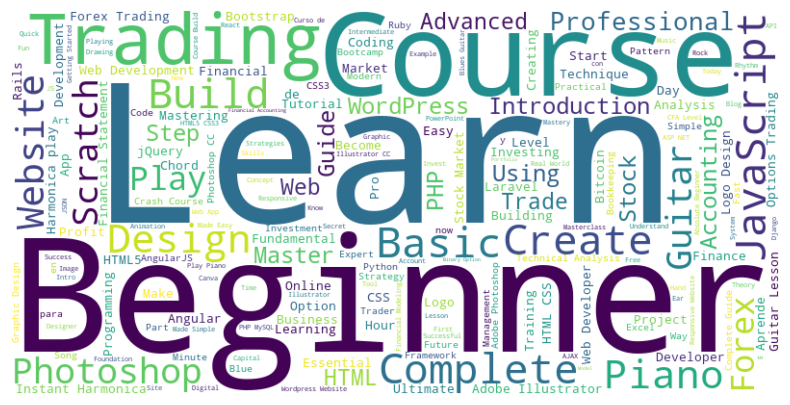

In [7]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(c_udemy_df['course_title'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el wordcloud utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(c_udemy_df['course_title'])
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
word_count_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
word_count_df = word_count_df.sort_values(by='Count', ascending=False)

In [9]:
word_count_df.head(15)

,Word,Count
69,Learn,491
21,Trading,254
2185,Web,205
251,Beginners,201
3,Course,193
3026,Guitar,193
4,Complete,180
2079,Design,172
3037,Piano,161
115,Build,159


In [20]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(c_udemy_df['level'])
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
wc_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
wc_df = wc_df.sort_values(by='Count', ascending=False)
wc_df.head(15)

,Word,Count
0,Levels,1929
2,Level,1749
3,Beginner,1270
1,Intermediate,421
4,Expert,58


In [29]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(c_udemy_df['subject'])
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
wc_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
wc_df = wc_df.sort_values(by='Count', ascending=False)
wc_df.head(15)

,Word,Count
6,Web,1200
7,Development,1200
0,Business,1195
1,Finance,1195
4,Musical,680
5,Instruments,680
2,Graphic,603
3,Design,603


In [33]:
# Suponiendo que tu DataFrame se llama "df"
conteo_paid = c_udemy_df['is_paid'].value_counts()
print(conteo_paid)

True     3368
False     310
Name: is_paid, dtype: int64


In [34]:
c_udemy_df['course_revenue'] = c_udemy_df['price'] * c_udemy_df['num_subscribers']

In [43]:
# Agrupar por nivel y sumar los ingresos
revenue_por_subject = c_udemy_df.groupby('subject')['course_revenue'].sum()
revenue_por_subject

subject
Business Finance       123735315
Graphic Design          76983170
Musical Instruments     53359055
Web Development        630843775
Name: course_revenue, dtype: int64

In [44]:
# Agrupar por nivel y sumar los ingresos
revenue_por_nivel = c_udemy_df.groupby('level')['course_revenue'].sum()
revenue_por_nivel

level
All Levels            610039770
Beginner Level        219678340
Expert Level            5469070
Intermediate Level     49734135
Name: course_revenue, dtype: int64

In [46]:
cursos_mas_costosos = c_udemy_df.nlargest(10, 'price')
cursos_mas_costosos

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,course_revenue
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance,165400
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,True,200,4284,93,76,All Levels,5.0,2015-09-11T16:47:02Z,Business Finance,856800
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-mo...,True,200,1380,42,17,All Levels,1.0,2016-10-18T22:52:31Z,Business Finance,276000
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28T16:41:44Z,Business Finance,58800
17,564966,The Complete Chart Pattern Trading Course: A P...,https://www.udemy.com/make-money-trading-stock...,True,200,2666,115,52,All Levels,4.0,2015-08-10T21:07:35Z,Business Finance,533200
20,1242604,Winning Forex Trading with Live Forex Trading ...,https://www.udemy.com/forexmacross/,True,200,809,3,25,All Levels,2.0,2017-06-06T02:54:04Z,Business Finance,161800
21,798740,Forex Traders - Create Your First Trading Robo...,https://www.udemy.com/launch-your-amazing-fore...,True,200,2295,84,39,All Levels,4.0,2016-05-02T19:26:48Z,Business Finance,459000
26,353044,Investing 101: The Complete Online Investing C...,https://www.udemy.com/online-investing-guide/,True,200,5334,373,42,All Levels,4.5,2014-11-28T17:49:03Z,Business Finance,1066800


In [48]:
cursos_con_mas_suscriptores = c_udemy_df.nlargest(10, 'num_subscribers')
cursos_con_mas_suscriptores

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,course_revenue
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,0
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development,0
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,24316800
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,22902400
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15T17:00:33Z,Musical Instruments,0
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development,0
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development,2546910
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19T03:02:05Z,Web Development,0
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development,13932100


In [49]:
cursos_con_mas_reviews = c_udemy_df.nlargest(10, 'num_reviews')
cursos_con_mas_reviews

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,course_revenue
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,22902400
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11T07:29:29Z,Web Development,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development,13932100
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28T19:20:21Z,Web Development,9146700
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24T00:57:25Z,Web Development,10388175
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31T21:07:48Z,Web Development,11350560
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,0
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150,40070,8341,194,All Levels,9.5,2016-03-03T20:17:59Z,Web Development,6010500
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07T06:27:51Z,Musical Instruments,15099800


In [51]:
cursos_mas_costosos_info = cursos_mas_costosos[['course_title', 'num_subscribers', 'course_revenue']]
cursos_mas_costosos_info

,course_title,num_subscribers,course_revenue
0,Ultimate Investment Banking Course,2147,429400
4,How To Maximize Your Profits Trading Options,1276,255200
9,The Only Investment Strategy You Need For Your...,827,165400
10,Forex Trading Secrets of the Pros With Amazon'...,4284,856800
11,Trading Options With Money Flow,1380,276000
14,Python Algo Trading: Sentiment Trading with News,294,58800
17,The Complete Chart Pattern Trading Course: A P...,2666,533200
20,Winning Forex Trading with Live Forex Trading ...,809,161800
21,Forex Traders - Create Your First Trading Robo...,2295,459000
26,Investing 101: The Complete Online Investing C...,5334,1066800


In [52]:
cursos_con_mas_suscriptores_info = cursos_con_mas_suscriptores[['course_title', 'num_subscribers', 'course_revenue']]
cursos_con_mas_suscriptores_info

,course_title,num_subscribers,course_revenue
2827,Learn HTML5 Programming From Scratch,268923,0
3032,Coding for Entrepreneurs Basic,161029,0
3230,The Web Developer Bootcamp,121584,24316800
2783,Build Your First Website in 1 Week with HTML5 ...,120291,0
3232,The Complete Web Developer Course 2.0,114512,22902400
1896,Free Beginner Electric Guitar Lessons,101154,0
2589,Web Design for Web Developers: Build Beautiful...,98867,0
2619,Learn Javascript & JQuery From Scratch,84897,2546910
3289,Practical PHP: Master the Basics and Code Dyna...,83737,0
3247,JavaScript: Understanding the Weird Parts,79612,13932100


In [53]:
curso_con_mas_reviews_info = cursos_con_mas_reviews[['course_title', 'num_reviews', 'course_revenue']]
curso_con_mas_reviews_info

,course_title,num_reviews,course_revenue
3230,The Web Developer Bootcamp,27445,24316800
3232,The Complete Web Developer Course 2.0,22412,22902400
3204,Angular 4 (formerly Angular 2) - The Complete ...,19649,14018770
3247,JavaScript: Understanding the Weird Parts,16976,13932100
3254,Modern React with Redux,15117,9146700
3246,Learn and Understand AngularJS,11580,10388175
3251,Learn and Understand NodeJS,11123,11350560
2827,Learn HTML5 Programming From Scratch,8629,0
3228,Angular 2 with TypeScript for Beginners: The P...,8341,6010500
1979,Pianoforall - Incredible New Way To Learn Pian...,7676,15099800


In [56]:
cursos_mayor_revenue = c_udemy_df.nlargest(10, 'course_revenue')
cursos_mayor_revenue_info = cursos_mayor_revenue[['course_title','price', 'num_subscribers', 'course_revenue']]
cursos_mayor_revenue_info

,course_title,price,num_subscribers,course_revenue
3230,The Web Developer Bootcamp,200,121584,24316800
3232,The Complete Web Developer Course 2.0,200,114512,22902400
1979,Pianoforall - Incredible New Way To Learn Pian...,200,75499,15099800
3204,Angular 4 (formerly Angular 2) - The Complete ...,190,73783,14018770
3247,JavaScript: Understanding the Weird Parts,175,79612,13932100
3251,Learn and Understand NodeJS,195,58208,11350560
2662,The Complete HTML & CSS Course - From Novice T...,195,57422,11197290
3175,Complete PHP Course With Bootstrap3 CMS System...,195,55332,10789740
3246,Learn and Understand AngularJS,175,59361,10388175
3254,Modern React with Redux,180,50815,9146700


In [60]:
# Filtrar los datos de cursos pagos y gratuitos
pagos = c_udemy_df[c_udemy_df['is_paid'] == True]
gratuitos = c_udemy_df[c_udemy_df['is_paid'] == False]

In [61]:
# Calcular el número total de suscriptores de cursos pagos y gratuitos
total_pagos = pagos['num_subscribers'].sum()
total_gratuitos = gratuitos['num_subscribers'].sum()

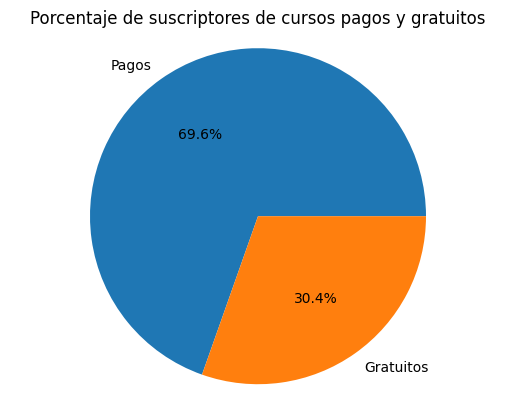

In [62]:
# Crear un gráfico de pastel para mostrar los porcentajes de suscriptores de cursos pagos y gratuitos
labels = ['Pagos', 'Gratuitos']
sizes = [total_pagos, total_gratuitos]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Porcentaje de suscriptores de cursos pagos y gratuitos')
plt.axis('equal')
plt.show()

In [63]:
# Analizar el porcentaje de suscriptores de cursos pagos según el tema (subject)
porcentaje_pagos_por_tema = pagos.groupby('subject')['num_subscribers'].sum() / total_pagos * 100

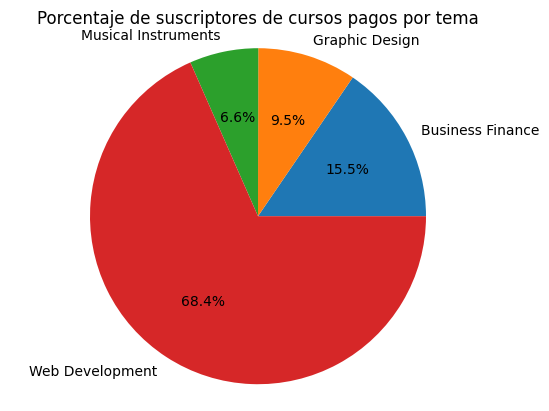

In [64]:
# Gráfico de pastel para mostrar el porcentaje de suscriptores de cursos pagos por tema
porcentaje_pagos_por_tema.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de suscriptores de cursos pagos por tema')
plt.axis('equal')
plt.ylabel('')
plt.show()

In [65]:
# Analizar el porcentaje de suscriptores de cursos gratuitos según el tema (subject)
porcentaje_gratuitos_por_tema = gratuitos.groupby('subject')['num_subscribers'].sum() / total_gratuitos * 100

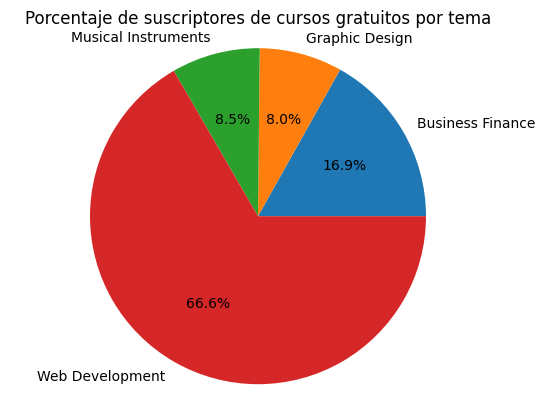

In [66]:
# Crear un gráfico de pastel para mostrar el porcentaje de suscriptores de cursos gratuitos por tema
porcentaje_gratuitos_por_tema.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de suscriptores de cursos gratuitos por tema')
plt.axis('equal')
plt.ylabel('')
plt.show()

In [128]:
c_udemy_df['published_timestamp'] = pd.to_datetime(c_udemy_df['published_timestamp'])
c_udemy_df['year_published'] = c_udemy_df['published_timestamp'].dt.year

C:\Users\david\AppData\Local\Temp\ipykernel_20752\860214622.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sub_df.corr()


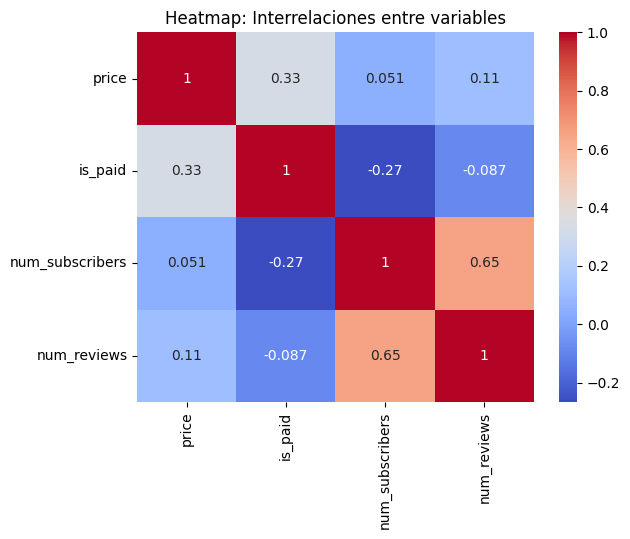

In [67]:
columns = ['subject', 'price', 'is_paid', 'num_subscribers', 'num_reviews', 'level']
# Crear una subselección del dataframe original con las columnas seleccionadas
sub_df = c_udemy_df[columns]
# Calcular la matriz de correlación entre las variables
correlation_matrix = sub_df.corr()
# Crear un heatmap utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Interrelaciones entre variables')
plt.show()

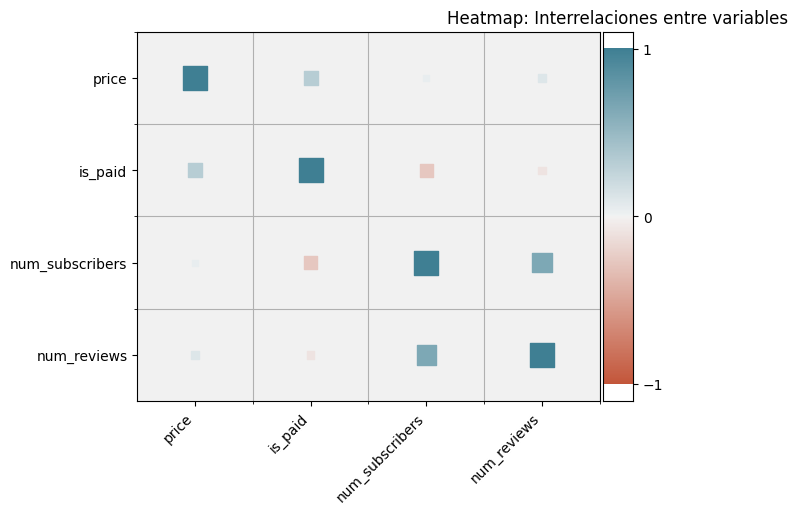

In [70]:
# Crear un heatmap utilizando la función corrplot() de heatmapz
corrplot(correlation_matrix, size_scale=300)
plt.title('Heatmap: Interrelaciones entre variables')
plt.show()

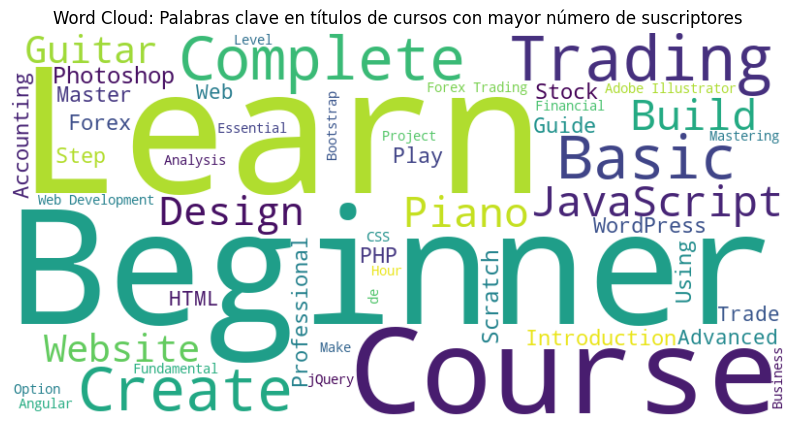

In [71]:
# Ordenar los cursos por número de suscriptores en orden descendente
cursos_mas_suscriptores = c_udemy_df.sort_values(by='num_subscribers', ascending=False)

# Obtener los títulos de los cursos con mayor número de suscriptores
titulos_cursos_mas_suscriptores = cursos_mas_suscriptores['course_title'].values.tolist()

# Unir los títulos de los cursos en un solo texto
texto_cursos = ' '.join(titulos_cursos_mas_suscriptores)

# Crear un Word Cloud con las palabras clave más repetidas
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(texto_cursos)

# Mostrar el Word Cloud utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud: Palabras clave en títulos de cursos con mayor número de suscriptores')
plt.axis('off')
plt.show()

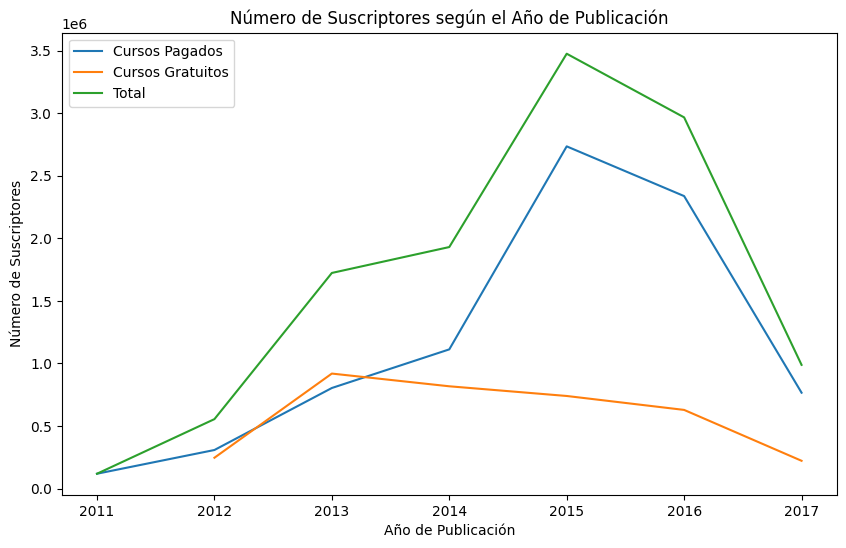

In [73]:
c_udemy_df['is_paid_str'] = c_udemy_df['is_paid'].map({True: 'Pagado', False: 'No Pagado'})

# Filtrar los datos para cursos pagados y no pagados
pagos = c_udemy_df[c_udemy_df['is_paid'] == True]
gratuitos = c_udemy_df[c_udemy_df['is_paid'] == False]

# Calcular el número de suscriptores por año para cursos pagados y no pagados
suscriptores_pagos_por_año = pagos.groupby('year_published')['num_subscribers'].sum()
suscriptores_gratuitos_por_año = gratuitos.groupby('year_published')['num_subscribers'].sum()

# Calcular el número total de suscriptores por año
suscriptores_totales_por_año = c_udemy_df.groupby('year_published')['num_subscribers'].sum()

# Crear gráficos de líneas para mostrar el número de suscriptores por año, incluyendo el total
plt.figure(figsize=(10, 6))
plt.plot(suscriptores_pagos_por_año.index, suscriptores_pagos_por_año.values, label='Cursos Pagados')
plt.plot(suscriptores_gratuitos_por_año.index, suscriptores_gratuitos_por_año.values, label='Cursos Gratuitos')
plt.plot(suscriptores_totales_por_año.index, suscriptores_totales_por_año.values, label='Total')
plt.xlabel('Año de Publicación')
plt.ylabel('Número de Suscriptores')
plt.title('Número de Suscriptores según el Año de Publicación')
plt.legend()
plt.show()

In [75]:
# Calcular el número de inscritos en cursos pagados y gratuitos
inscritos_pagados = pagos['num_subscribers'].sum()
inscritos_gratuitos = gratuitos['num_subscribers'].sum()

# Calcular la tasa de conversión
tasa_conversion = (inscritos_pagados / inscritos_gratuitos) * 100
tasa_conversion

228.87813677711665

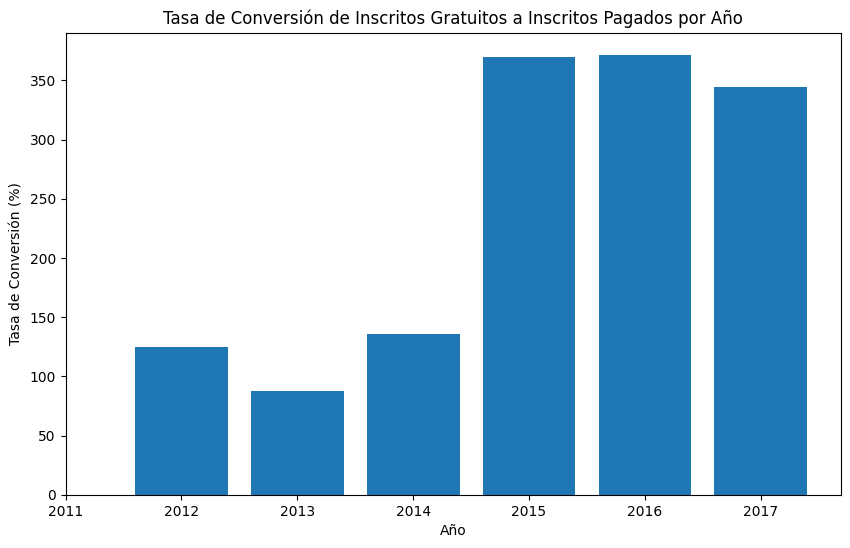

In [76]:
# Calcular el número de inscritos en cursos pagados y gratuitos por año
inscritos_pagados_por_año = pagos.groupby('year_published')['num_subscribers'].sum()
inscritos_gratuitos_por_año = gratuitos.groupby('year_published')['num_subscribers'].sum()

# Calcular la tasa de conversión por año
tasa_conversion_por_año = (inscritos_pagados_por_año / inscritos_gratuitos_por_año) * 100

# Crear el gráfico de barras para mostrar la tasa de conversión por año
plt.figure(figsize=(10, 6))
plt.bar(tasa_conversion_por_año.index, tasa_conversion_por_año.values)
plt.xlabel('Año')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión de Inscritos Gratuitos a Inscritos Pagados por Año')
plt.xticks(tasa_conversion_por_año.index)
plt.show()

In [120]:
c_udemy_df.sample(15)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,course_revenue,year_published,is_paid_str
98,572744,Trend Traders Club: How To Find And Trade Fast...,https://www.udemy.com/how-to-find-and-trade-pr...,True,75,1513,31,60,All Levels,5.500000,2015-08-04 19:16:51+00:00,Business Finance,113475,2015,Pagado
833,614472,The Advanced Forex Course for Smart Traders,https://www.udemy.com/advanced-forex-course/,False,0,8236,144,25,All Levels,5.000000,2015-10-09 16:46:49+00:00,Business Finance,0,2015,No Pagado
3180,1210652,HTML5 and CSS3: Learn Web Design with HTML + C...,https://www.udemy.com/html-css-bootstrap-build...,True,200,346,28,74,Beginner Level,8.500000,2017-06-21 18:15:23+00:00,Web Development,69200,2017,Pagado
2958,739770,PHP MySQL: Learn PHP MySQL with Project,https://www.udemy.com/php-mysql-project-learning/,True,20,2314,77,25,All Levels,2.000000,2016-04-21 02:06:22+00:00,Web Development,46280,2016,Pagado
2918,1189280,Introduction to Node.js for Beginners,https://www.udemy.com/introduction-to-nodejs-f...,True,125,1367,17,58,Beginner Level,6.000000,2017-04-24 23:55:11+00:00,Web Development,170875,2017,Pagado
3454,1021834,JavaScript for beginners in 1 hour,https://www.udemy.com/learn-javascript-in-1-ho...,True,95,2086,56,22,Beginner Level,1.000000,2016-12-12 16:52:38+00:00,Web Development,198170,2016,Pagado
900,235112,Forex - Catch the Big Market Moves in Forex,https://www.udemy.com/how-to-catch-the-big-mar...,True,20,212,25,14,Intermediate Level,1.500000,2014-06-02 06:52:58+00:00,Business Finance,4240,2014,Pagado
783,1169196,"Credit concepts and checklist for bankers, cre...",https://www.udemy.com/credit-concepts-and-chec...,True,20,0,0,10,Beginner Level,2.500000,2017-04-24 14:56:01+00:00,Business Finance,0,2017,Pagado
2529,629088,Code your first Website using HTML & CSS: Proj...,https://www.udemy.com/code-your-first-website-...,True,20,9554,368,16,Beginner Level,1.500000,2015-10-28 18:16:52+00:00,Web Development,191080,2015,Pagado
1336,358998,Sketch 3: Design a mobile application from scr...,https://www.udemy.com/mobile-app-design/,True,45,709,14,31,All Levels,2.500000,2014-12-08 10:43:52+00:00,Graphic Design,31905,2014,Pagado


In [132]:
c_edx_df=pd.read_csv("edx_courses.csv")

In [187]:
c_edx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 973
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               855 non-null    object 
 1   summary             806 non-null    object 
 2   n_enrolled          855 non-null    float64
 3   course_type         855 non-null    object 
 4   institution         855 non-null    object 
 5   instructors         852 non-null    object 
 6   Level               855 non-null    object 
 7   subject             855 non-null    object 
 8   language            855 non-null    object 
 9   subtitles           852 non-null    object 
 10  course_effort       855 non-null    object 
 11  course_length       855 non-null    object 
 12  price               855 non-null    object 
 13  course_description  822 non-null    object 
 14  course_syllabus     363 non-null    object 
 15  course_url          855 non-null    object 
 16  price_ex

In [174]:
c_edx_df.sample(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_extracted,ideal_revenue,possible_revenue
477,Alzheimer’s Disease & Dementia Care,"Provides an overview of Alzheimer’s disease, i...",5763.0,Self-paced on your time,Salisbury University-University System of Mary...,Mary DiBartolo,Intermediate,Medicine,English,English,2–3 hours per week,5 Weeks,FREE-Add a Verified Certificate for $49 USD,"Are you a current or future caregiver, or, a n...",NaN,https://www.edx.org/course/alzheimers-disease-...,49,282387.0,196541.0
453,PredictionX: John Snow and the Cholera Epidemi...,NaN,17713.0,Self-paced on your time,Harvard University,Alyssa Goodman,Introductory,History,English,English,3–5 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"In 1854, a cholera epidemic swept through the ...",NaN,https://www.edx.org/course/predictionx-john-sn...,25,442825.0,308206.0
862,Sensor Fusion and Non-linear Filtering for Aut...,Learn fundamental algorithms for sensor fusion...,9709.0,Instructor-led on a course schedule,Chalmers University of Technology,Lars Hammarstrand,Advanced,Engineering,English,English,10–20 hours per week,6 Weeks,FREE-Add a Verified Certificate for $299 USD,"In this course, we will introduce you to the f...",Section 1 - Introduction and Primer in statist...,https://www.edx.org/course/sensor-fusion-and-n...,299,2902991.0,2020482.0
32,Principles of Biochemistry,This introduction to biochemistry explores the...,257600.0,Self-paced on your time,Harvard University,Alain Viel-Rachelle Gaudet,Intermediate,Medicine,English,English,4–6 hours per week,15 Weeks,FREE-Add a Verified Certificate for $199 USD,Principles of Biochemistry integrates an intro...,NaN,https://www.edx.org/course/principles-of-bioch...,199,51262400.0,35678630.0
371,Introducción a los encofrados y las cimbras en...,Aprende sobre la construcción de obras civiles...,16029.0,Self-paced on your time,Universitat Politècnica de Valencia,Víctor Yepes Piqueras,Introductory,Engineering,Español,Español,2–3 hours per week,4 Weeks,FREE-Add a Verified Certificate for $50 USD,Este es un curso en línea básico de construcci...,NaN,https://www.edx.org/course/introduccion-a-los-...,50,801450.0,557809.0


In [16]:
c_edx_df.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [160]:
# Eliminar las filas con valores NaN en la columna 'n_enrolled'
c_edx_df = c_edx_df.dropna(subset=['n_enrolled'])

In [117]:
conteo_precios = c_edx_df['price'].value_counts()
conteo_precios

FREE-Add a Verified Certificate for $49 USD        270
FREE-Add a Verified Certificate for $99 USD        137
FREE-Add a Verified Certificate for $50 USD         96
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        78
FREE-Add a Verified Certificate for $25 USD         49
FREE-Add a Verified Certificate for $139 USD        33
FREE-Add a Verified Certificate for $150 USD        30
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE-Add a

In [152]:
# Extraer el precio del contenido utilizando una expresión regular
c_edx_df['price_extracted'] = c_edx_df['price'].str.extract(r'\$(\d+\.?\d*)')

In [153]:
# Eliminar las comas de la columna 'n_enrolled'
c_edx_df['n_enrolled'] = c_edx_df['n_enrolled'].str.replace(',', '')

# Convertir la columna 'n_enrolled' a tipo numérico
c_edx_df['n_enrolled'] = pd.to_numeric(c_edx_df['n_enrolled'], errors='coerce')

In [154]:
nrolled_por_subject = c_edx_df.groupby('subject')['n_enrolled'].sum()
nrolled_por_subject

subject
Architecture                      456611.0
Art & Culture                     282312.0
Biology & Life Sciences          1763832.0
Business & Management            7076563.0
Chemistry                         197535.0
Communication                    4641327.0
Computer Science                12447737.0
Data Analysis & Statistics       4264412.0
Design                            108281.0
Economics & Finance               835907.0
Education & Teacher Training      706532.0
Electronics                       109932.0
Energy & Earth Sciences            50362.0
Engineering                      1396839.0
Environmental Studies             368185.0
Ethics                              6366.0
Food & Nutrition                  197479.0
Health & Safety                   325912.0
History                           530724.0
Humanities                       3504140.0
Language                         1063257.0
Law                               291436.0
Literature                        191592.0
Mat

In [173]:
# Calcular el revenue multiplicando 'n_enrolled' y 'price_extracted'
c_edx_df['ideal_revenue'] = c_edx_df['n_enrolled'] * pd.to_numeric(c_edx_df['price_extracted'], errors='coerce')
# Calcular el revenue proyectado
c_edx_df['possible_revenue'] = c_edx_df['ideal_revenue'] *(0.696)
c_edx_df['possible_revenue'] = c_edx_df['possible_revenue'].round()

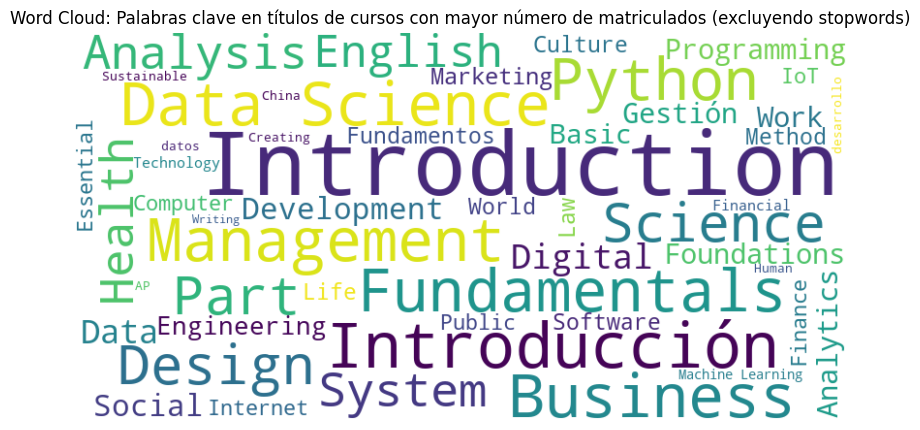

In [186]:
# Ordenar los cursos por número de suscriptores en orden descendente
c_mas_suscriptores = c_edx_df.sort_values(by='n_enrolled', ascending=False)

# Obtener los títulos de los cursos con mayor número de suscriptores
tit_cursos_mas_suscriptores = c_mas_suscriptores['title'].values.tolist()

# Unir los títulos de los cursos en un solo texto
texto_cursos = ' '.join(tit_cursos_mas_suscriptores)

# Definir stopwords personalizadas
stopwords_personalizadas = ['de', 'la', 'en', 'por', 'para', 'el', 'y', 'con', 'las', 'los', 's']  # Agrega las palabras que deseas excluir

# Crear el conjunto de stopwords combinando las stopwords predeterminadas y las personalizadas
stopwords = set(list(STOPWORDS) + stopwords_personalizadas)

# Crear el WordCloud excluyendo las stopwords
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=stopwords).generate(texto_cursos)

# Mostrar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud: Palabras clave en títulos de cursos con mayor número de matriculados (excluyendo stopwords)')
plt.axis('off')
plt.show()

In [179]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(c_edx_df['title'])
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
wc_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
wc_df = wc_df.sort_values(by='Count', ascending=False)
wc_df.head(15)

,Word,Count
8,Introduction,64
50,Data,52
404,Introducción,32
10,Science,30
18,Management,30
228,Business,25
74,Fundamentals,24
82,Learning,24
76,Part,21
268,para,21


In [189]:
# Contar la cantidad de repeticiones de cada subject
repeticiones_subject = c_edx_df['subject'].value_counts()

# Contar la cantidad de repeticiones de cada nivel
repeticiones_nivel = c_edx_df['Level'].value_counts()

# Contar la cantidad de repeticiones de cada institución
repeticiones_institucion = c_edx_df['institution'].value_counts()

In [196]:
# Ordenar las categorías en orden descendente según la cantidad de repeticiones
sorted_subjects = repeticiones_subject.sort_values(ascending=False)
sorted_instituciones = repeticiones_institucion.sort_values(ascending=False)

# Calcular el porcentaje acumulado de cada categoría
porcentaje_acumulado_subjects = sorted_subjects.cumsum() / sorted_subjects.sum() * 100
porcentaje_acumulado_instituciones = sorted_instituciones.cumsum() / sorted_instituciones.sum() * 100

# Identificar el umbral para considerar las categorías más importantes (por ejemplo, el 80%)
umbral = 80

# Seleccionar las categorías más importantes según el umbral
importantes_subjects = sorted_subjects[porcentaje_acumulado_subjects <= umbral]
importantes_instituciones = sorted_instituciones[porcentaje_acumulado_instituciones <= umbral]

In [190]:
repeticiones_subject

Computer Science                150
Business & Management           146
Humanities                       62
Data Analysis & Statistics       60
Engineering                      49
Social Sciences                  46
Economics & Finance              37
Communication                    35
Biology & Life Sciences          34
Language                         27
Education & Teacher Training     26
Math                             23
Medicine                         23
Physics                          17
History                          17
Environmental Studies            14
Art & Culture                    10
Health & Safety                   9
Law                               9
Science                           9
Design                            8
Electronics                       7
Food & Nutrition                  6
Philosophy & Ethics               6
Music                             6
Chemistry                         5
Energy & Earth Sciences           5
Architecture                

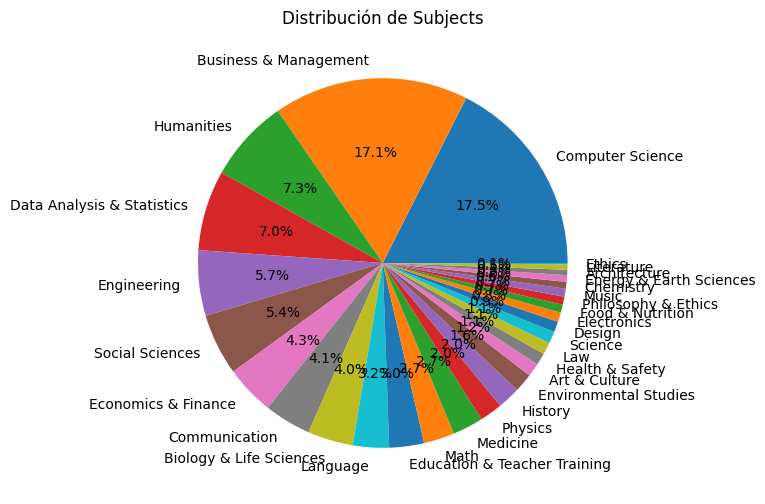

In [193]:
# Gráfico de pastel para los subjects
plt.figure(figsize=(8, 6))
repeticiones_subject.plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Subjects')
plt.ylabel('')
plt.show()

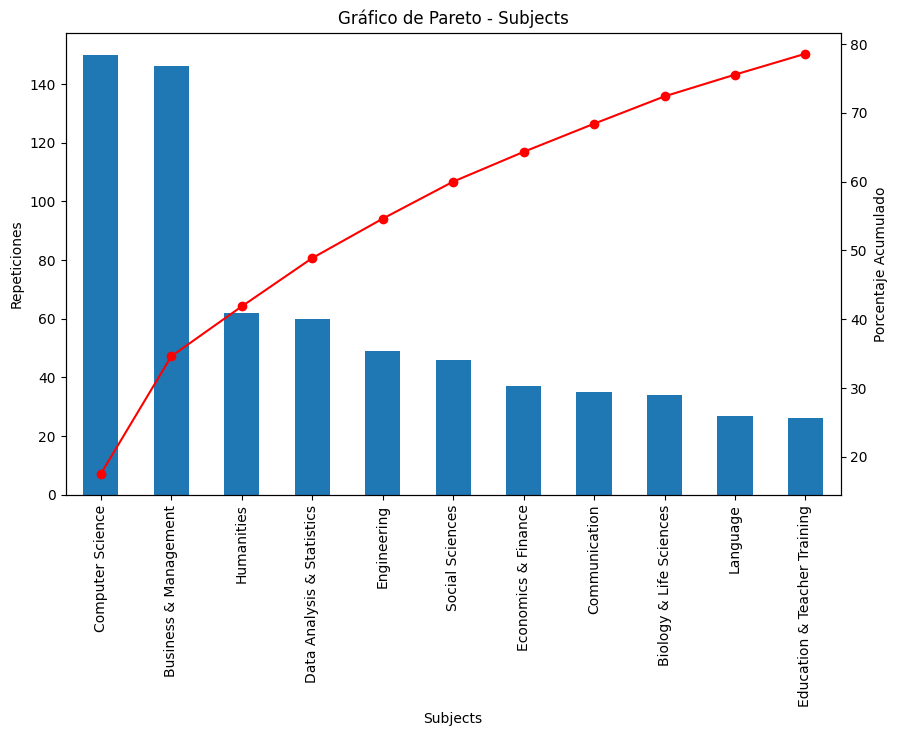

In [209]:
# Crear el gráfico de Pareto para subjects
plt.figure(figsize=(10, 6))
ax1 = importantes_subjects.plot(kind='bar')
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), porcentaje_acumulado_subjects[:len(ax1.get_xticks())], 'r-o')
ax1.set_xticklabels(importantes_subjects.index, rotation='vertical')
ax1.set_title('Gráfico de Pareto - Subjects')
ax1.set_xlabel('Subjects')
ax1.set_ylabel('Repeticiones')
ax2.set_ylabel('Porcentaje Acumulado')
ax2.grid(False)
plt.show()

In [191]:
repeticiones_nivel

Introductory    542
Intermediate    237
Advanced         76
Name: Level, dtype: int64

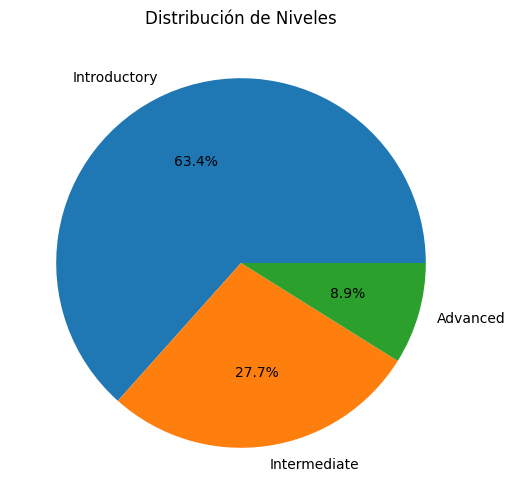

In [194]:
# Gráfico de pastel para los niveles
plt.figure(figsize=(8, 6))
repeticiones_nivel.plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Niveles')
plt.ylabel('')
plt.show()

In [192]:
repeticiones_institucion

Harvard University                                                        104
Universitat Politècnica de Valencia                                        45
Massachusetts Institute of Technology                                      37
Delft University of Technology                                             28
Inter-American Development Bank                                            27
                                                                         ... 
University System of Maryland-The University of Maryland, College Park      1
University of Oxford                                                        1
Davidson College                                                            1
Educational Testing Service                                                 1
University of Baltimore-University System of Maryland                       1
Name: institution, Length: 106, dtype: int64

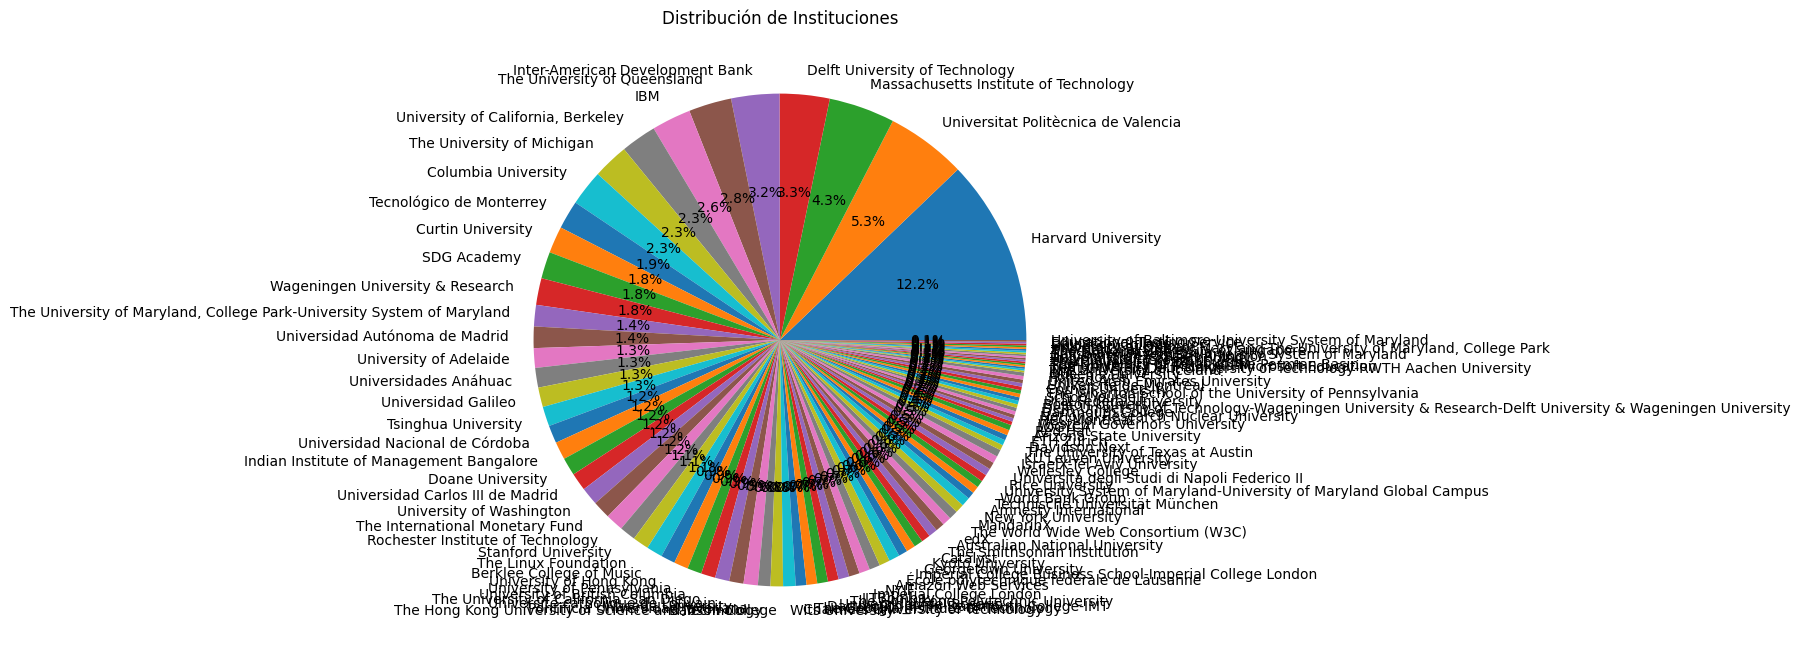

In [195]:
# Gráfico de pastel para las instituciones
plt.figure(figsize=(12, 8))
repeticiones_institucion.plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Instituciones')
plt.ylabel('')
plt.show()

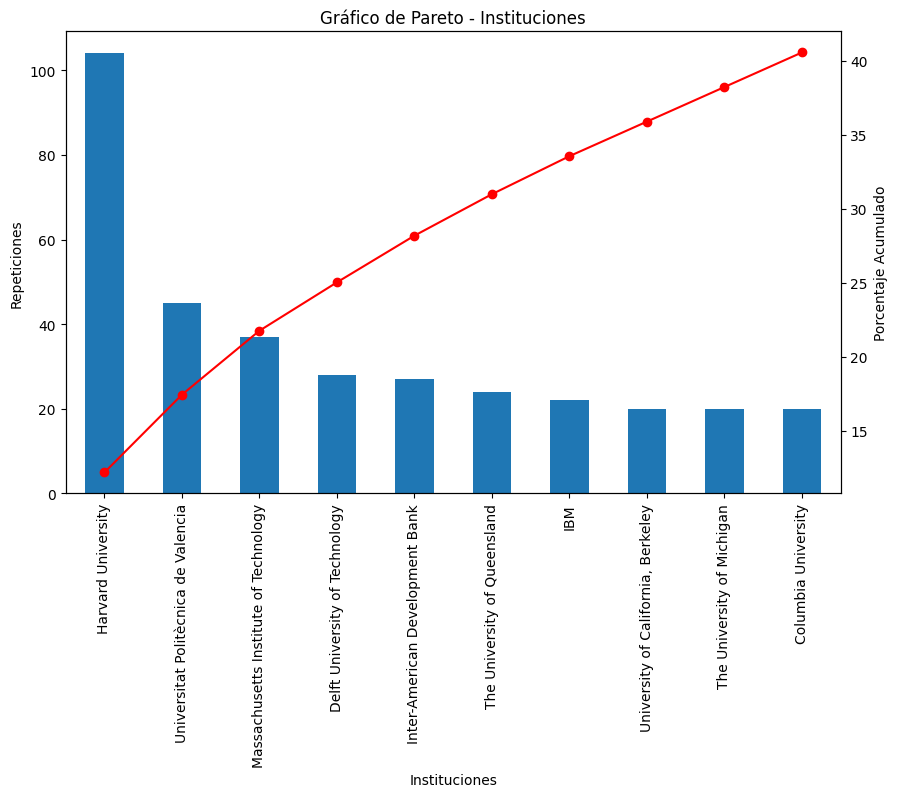

In [211]:
# Crear el gráfico de Pareto para instituciones
plt.figure(figsize=(10, 6))
ax3 = importantes_instituciones[:10].plot(kind='bar')
ax4 = ax3.twinx()
ax4.plot(range(len(ax3.get_xticks())), porcentaje_acumulado_instituciones[:len(ax3.get_xticks())], 'r-o')
ax3.set_xticklabels(importantes_instituciones.index[:10], rotation='vertical')
ax3.set_title('Gráfico de Pareto - Instituciones')
ax3.set_xlabel('Instituciones')
ax3.set_ylabel('Repeticiones')
ax4.set_ylabel('Porcentaje Acumulado')
ax4.grid(False)
plt.show()

In [237]:
c_cour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            623 non-null    object 
 1   institution     623 non-null    object 
 2   course_url      623 non-null    object 
 3   course_id       623 non-null    object 
 4   rating_average  604 non-null    float64
 5   vote_count      604 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.3+ KB


In [252]:
c_cour_df.head()

,name,institution,course_url,course_id,rating_average,vote_count
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.75,35895.0
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.81,3702.0
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.93,20085.0
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.78,35319.0
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.93,87.0


In [251]:
c_cour_df.describe()

,rating_average,vote_count
count,604.000000,604.000000
mean,4.630778,2408.461921
std,0.398211,4599.422887
min,1.000000,3.000000
25%,4.570000,374.250000
50%,4.730000,1071.500000
75%,4.820000,2408.250000
max,5.000000,45218.000000


In [216]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   reviews       1454571 non-null  object        
 1   reviewers     1454711 non-null  object        
 2   date_reviews  1454711 non-null  datetime64[ns]
 3   rating        1454711 non-null  int64         
 4   course_id     1454711 non-null  object        
 5   year          1454711 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 66.6+ MB


In [250]:
reviews_df.head()

,reviews,reviewers,date_reviews,rating,course_id,year
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,2020
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,2020


In [19]:
reviews_df.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [214]:
reviews_df['date_reviews'] = pd.to_datetime(reviews_df['date_reviews'])


In [215]:
reviews_df['year'] = reviews_df['date_reviews'].dt.year

In [247]:
top_institutions = c_cour_df['institution'].value_counts().head(15).index
top_df = c_cour_df[c_cour_df['institution'].isin(top_institutions)]

grouped_df = top_df.groupby('institution').agg({'vote_count': 'sum', 'rating_average': 'mean', 'course_id': 'count'}).reset_index()
grouped_df.columns = ['institution', 'vote_total', 'rating_average', 'course_count']

grouped_df['vote_average'] = grouped_df['vote_total'] / grouped_df['course_count']
grouped_df = grouped_df.sort_values('rating_average', ascending=False)

In [248]:
grouped_df

,institution,vote_total,rating_average,course_count,vote_average
14,Yale University,51850.0,4.861176,17,3050.000000
6,Universiteit Leiden,5056.0,4.767143,11,459.636364
13,University of Virginia,30958.0,4.716471,17,1821.058824
11,University of Michigan,167069.0,4.687097,31,5389.322581
12,University of Pennsylvania,70531.0,4.671163,43,1640.255814
4,Johns Hopkins University,57149.0,4.658462,14,4082.071429
1,Duke University,46134.0,4.642174,24,1922.250000
10,University of London,12450.0,4.640000,12,1037.500000
7,"University of California, Davis",25587.0,4.633077,13,1968.230769
8,"University of California, Irvine",36581.0,4.610667,15,2438.733333


In [218]:
rating_average_by_year = reviews_df.groupby('year')['rating'].mean().round(2)

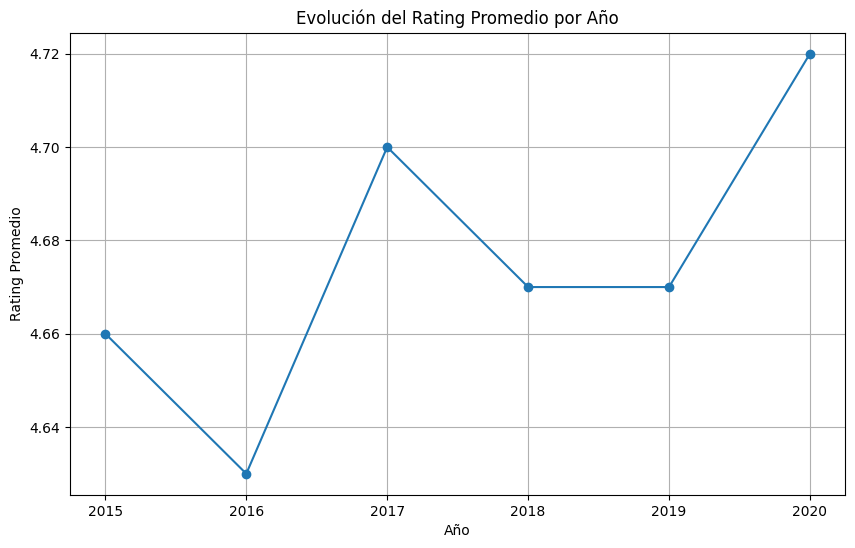

In [219]:
plt.figure(figsize=(10, 6))
plt.plot(rating_average_by_year.index, rating_average_by_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Evolución del Rating Promedio por Año')
plt.grid(True)
plt.show()

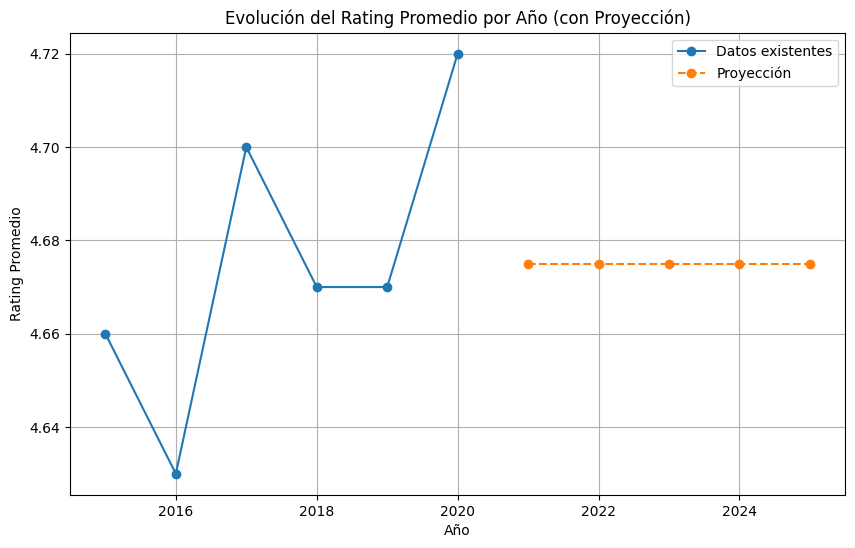

In [220]:
# Obtener los últimos 5 años del dataset de reviews
last_year = reviews_df['year'].max()
years = np.arange(last_year + 1, last_year + 6)

# Calcular el rating promedio proyectado para los próximos 5 años
rating_average_projected = rating_average_by_year.mean()  # Promedio de los ratings anteriores
rating_average_projected = np.repeat(rating_average_projected, 5)

# Mostrar la proyección del rating promedio
plt.figure(figsize=(10, 6))
plt.plot(rating_average_by_year.index, rating_average_by_year.values, marker='o', label='Datos existentes')
plt.plot(years, rating_average_projected, linestyle='--', marker='o', label='Proyección')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Evolución del Rating Promedio por Año (con Proyección)')
plt.legend()
plt.grid(True)
plt.show()

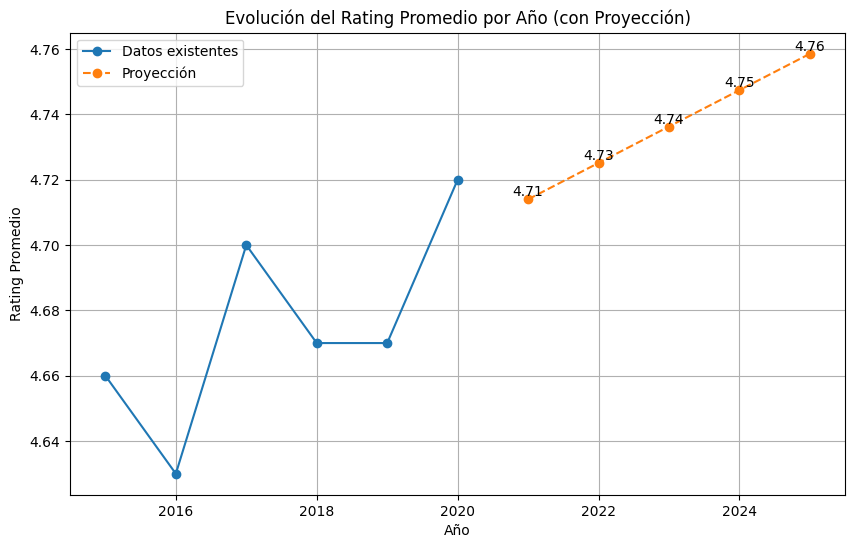

In [225]:
# Obtener los años como variable independiente (X) y el rating promedio como variable dependiente (y)
X = rating_average_by_year.index.values.reshape(-1, 1)
y = rating_average_by_year.values

# Crear el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, y)

# Generar los datos para los próximos 5 años
next_years = np.arange(last_year + 1, last_year + 6).reshape(-1, 1)

# Realizar la proyección utilizando el modelo de regresión
rating_average_projected = regression_model.predict(next_years)

# Mostrar la proyección del rating promedio
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Datos existentes')
plt.plot(next_years, rating_average_projected, linestyle='--', marker='o', label='Proyección')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Evolución del Rating Promedio por Año (con Proyección)')

# Mostrar los datos en cada punto de la proyección
for year, rating in zip(next_years.flatten(), rating_average_projected):
    plt.text(year, rating, f'{rating:.2f}', ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()

In [212]:
# Calcular el rating_average por course_id
rating_average = reviews_df.groupby('course_id')['rating'].mean().round(2)

# Calcular el vote_count por course_id
vote_count = reviews_df.groupby('course_id')['rating'].count()

# Agregar las columnas al primer dataset
c_cour_df['rating_average'] = c_cour_df['course_id'].map(rating_average)
c_cour_df['vote_count'] = c_cour_df['course_id'].map(vote_count)

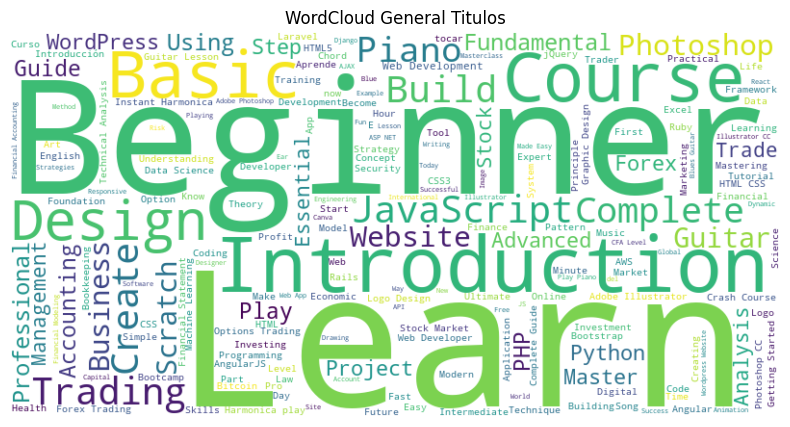

In [259]:
text_data = pd.concat([c_cour_df['name'], c_edx_df['title'], c_udemy_df['course_title']], ignore_index=True)
text = ' '.join(text_data.astype(str))
# Definir stopwords personalizadas
stopwords_personalizadas = ['de', 'la', 'en', 'por', 'para', 'el', 'y', 'con', 'las', 'los', 's']  # Agrega las palabras que deseas excluir

# Crear el conjunto de stopwords combinando las stopwords predeterminadas y las personalizadas
stopwords = set(list(STOPWORDS) + stopwords_personalizadas)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud General Titulos')
plt.axis('off')
plt.show()

In [255]:
# Concatenar todas las descripciones de los cursos en un solo texto
text = ' '.join(text_data.astype(str))
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
word_counter_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
word_counter_df = word_count_df.sort_values(by='Count', ascending=False)

In [258]:
word_counter_df.head(15)

,Word,Count
392,Learn,494
2631,Trading,254
17,Introduction,242
62,Web,213
120,Design,207
401,Beginners,205
30,Course,202
835,Guitar,194
2622,Complete,180
328,Build,162


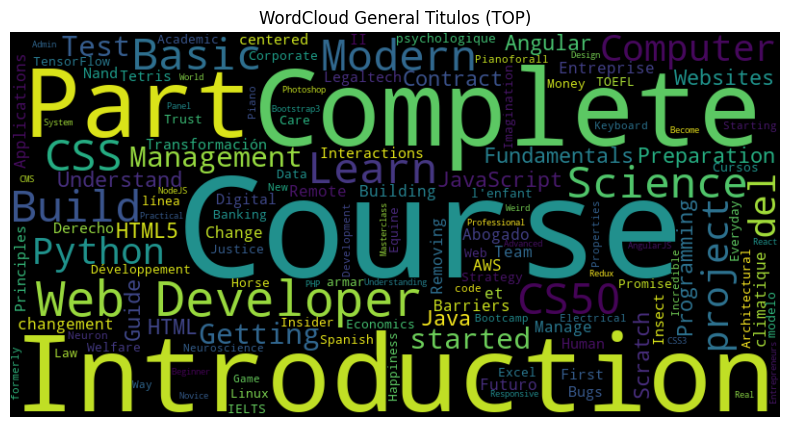

In [292]:
top_df1 = c_cour_df.sort_values('rating_average', ascending=False).head(15)
top_df2 = c_edx_df.sort_values('n_enrolled', ascending=False).head(15)
top_df3 = c_udemy_df.sort_values('course_revenue', ascending=False).head(15)
text_data2 = pd.concat([top_df1['name'], top_df2['title'], top_df3['course_title']], ignore_index=True)
text = ' '.join(text_data2.astype(str))
stopwords_personalizadas = ['de', 'la', 'en', 'por', 'para', 'el', 'y', 'con', 'las', 'los', 's']  # Agrega las palabras que deseas excluir
stopwords = set(list(STOPWORDS) + stopwords_personalizadas)
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud General Titulos (TOP)')
plt.axis('off')
plt.show()


In [290]:
word_frequencies = wordcloud.words_
total_words = len(text_data2)
for word, frequency in word_frequencies.items():
    word_frequencies[word] = frequency * total_words
df_word_frequencies = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
df_word_frequencies = df_word_frequencies.sort_values('Frequency', ascending=False)
top_15_words = df_word_frequencies.head(20)
top_15_words

,Word,Frequency
0,Course,45.0
2,Complete,45.0
1,Introduction,45.0
3,Part,36.0
4,Web Developer,36.0
8,CS50,27.0
10,CSS,27.0
9,Science,27.0
11,Learn,27.0
7,Basic,27.0


In [291]:
text_data2.head(45)

0            Building Modern Python Applications on AWS
1                   Entreprise et changement climatique
2                           How to Manage a Remote Team
3                           Removing Barriers to Change
4     El Abogado del Futuro: Legaltech y la Transfor...
5                   Bugs 101: Insect-Human Interactions
6     Build a Modern Computer from First Principles:...
7               Développement psychologique de l'enfant
8                        Economics of Money and Banking
9     The Horse Course: Introduction to Basic Care a...
10                                   Corporate Strategy
11                               Everyday Excel, Part 2
12                        Equine Welfare and Management
13                   Cursos en línea: modelo para armar
14                    Getting started with TensorFlow 2
15              CS50's Introduction to Computer Science
16                      IELTS Academic Test Preparation
17         TOEFL® Test Preparation: The Insider’